In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.read_csv(r"C:\Users\Dell\Downloads\EV-data\Electric_Vehicle_Population_Data.csv")

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [4]:
ev = pd.read_csv(r"C:\Users\Dell\Downloads\EV-data\Electric_Vehicle_Population_Data.csv")

In [11]:
ev.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
#Cleaning the data finding out all the null values and handelling all the nulls

In [6]:
ev.isnull().sum()[ev.isnull().sum()>0]

County                    5
City                      5
Postal Code               5
Legislative District    389
Vehicle Location          9
Electric Utility          5
2020 Census Tract         5
dtype: int64

In [12]:
ev.County.value_counts()#in this case nulls can be filled with most frequent value

County
King         92740
Snohomish    21001
Pierce       13782
Clark        10416
Thurston      6428
             ...  
Sarpy            1
Suffolk          1
Beaufort         1
Meade            1
Hardin           1
Name: count, Length: 196, dtype: int64

In [13]:
ev.County.fillna('King',inplace = True)

In [14]:
ev.City.value_counts()

City
Seattle          29447
Bellevue          8931
Redmond           6478
Vancouver         6193
Bothell           5863
                 ...  
Plymouth             1
Tempe                1
Chapel Hill          1
Vista                1
Elizabethtown        1
Name: count, Length: 723, dtype: int64

In [15]:
ev.City.fillna('Seattle',inplace = True)

In [37]:
ev.rename(columns={'Postal Code':'Postal_Code','Legislative District':'Legislative_District','Vehicle Location':'Vehicle_Location','Electric Utility':'Electric_Utility','2020 Census Tract':'2020_Census_Tract'},inplace = True)

In [38]:
list(ev.columns)

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Postal_Code',
 'Model Year',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Base MSRP',
 'Legislative_District',
 'DOL Vehicle ID',
 'Vehicle_Location',
 'Electric_Utility',
 '2020_Census_Tract']

In [39]:
ev.isnull().sum()[ev.isnull().sum()>0]

2020_Census_Tract    5
dtype: int64

In [46]:
ev.Postal_Code.fillna(98052,inplace = True)
ev.Legislative_District.fillna(41,inplace = True)
ev.Vehicle_Location.fillna('POINT (-122.12302 47.67668)',inplace = True)
ev.Electric_Utility.fillna('PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',inplace = True)
ev.Census_Tract.fillna(5.303303e+10,inplace = True)

In [47]:
ev.isnull().sum()[ev.isnull().sum()>0]

Series([], dtype: int64)

In [42]:
ev.rename(columns={'2020_Census_Tract':'Census_Tract'},inplace = True)

In [48]:
ev.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal_Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative_District                                 0
DOL Vehicle ID                                       0
Vehicle_Location                                     0
Electric_Utility                                     0
Census_Tract                                         0
dtype: int64

In [49]:
#Start with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:

In [54]:
ev_adoption_over_yrs = ev['Model Year'].value_counts().sort_index()
ev_adoption_over_yrs

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

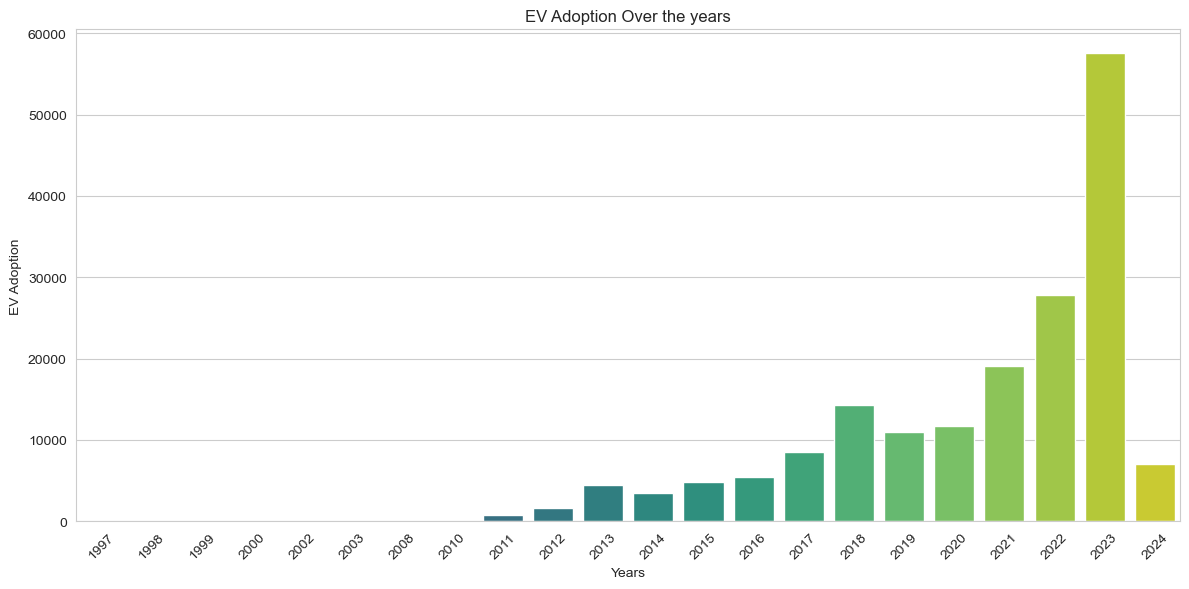

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x = ev_adoption_over_yrs.index,y = ev_adoption_over_yrs.values,palette="viridis")
sns.set_style("whitegrid")
plt.title('EV Adoption Over the years')
plt.xlabel('Years')
plt.ylabel('EV Adoption')
plt.xticks(rotation=45);
plt.tight_layout()

In [81]:
value_counts = ev.Make.value_counts()

In [86]:
top_ev_makers = value_counts[value_counts > 800]
top_ev_makers

Make
TESLA            79659
NISSAN           13998
CHEVROLET        13678
FORD              9199
BMW               7570
KIA               7432
TOYOTA            6288
VOLKSWAGEN        5004
JEEP              4480
HYUNDAI           4406
RIVIAN            4312
VOLVO             4133
AUDI              3646
CHRYSLER          2993
MERCEDES-BENZ     1589
PORSCHE           1139
MITSUBISHI         958
MINI               898
POLESTAR           882
HONDA              833
SUBARU             831
Name: count, dtype: int64

Text(0, 0.5, 'Production')

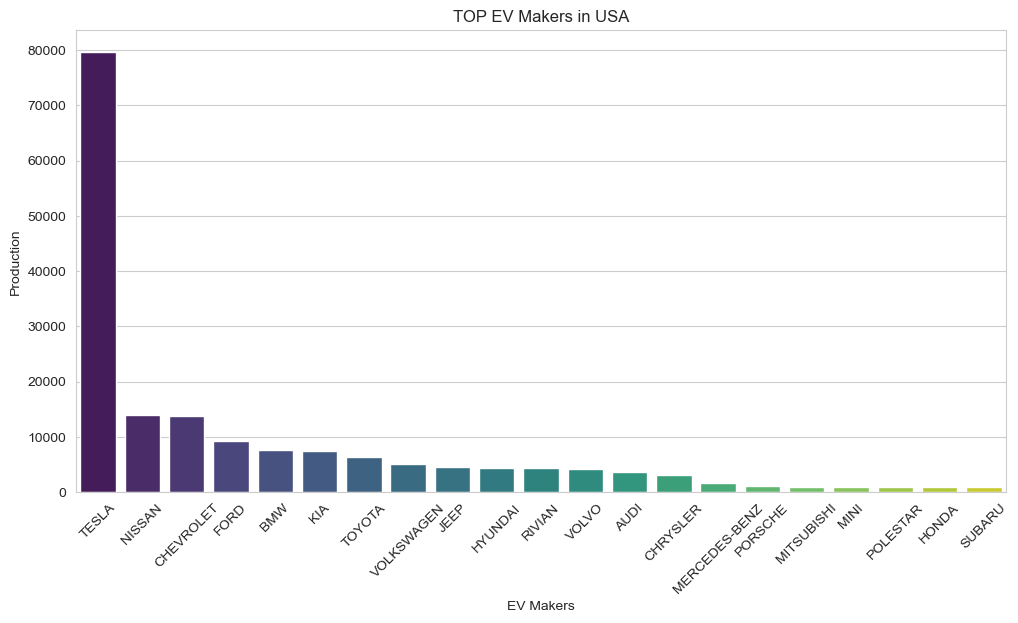

In [91]:
plt.figure(figsize=(12,6))
sns.barplot(x = top_ev_makers.index,y = top_ev_makers.values,palette = 'viridis')
plt.xticks(rotation=45);
plt.title('TOP EV Makers in USA')
plt.xlabel("EV Makers")
plt.ylabel('Production')

In [94]:
ev_preferred_type = ev['Electric Vehicle Type'].value_counts()
ev_preferred_type

Electric Vehicle Type
Battery Electric Vehicle (BEV)            139210
Plug-in Hybrid Electric Vehicle (PHEV)     38656
Name: count, dtype: int64

Text(0, 0.5, 'Tyes of Ev')

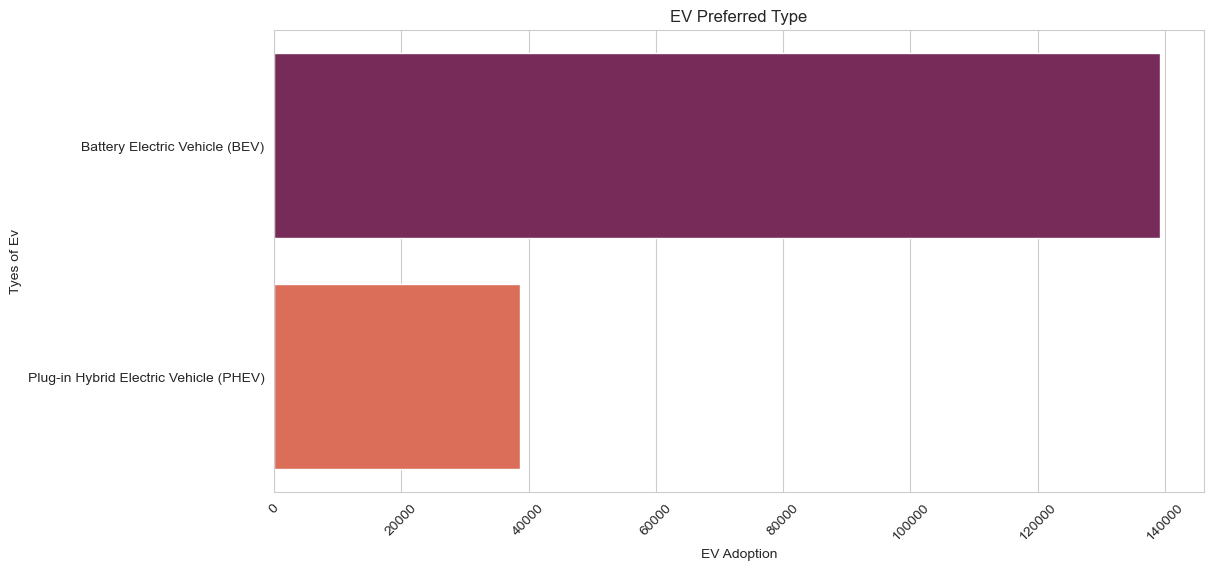

In [96]:
plt.figure(figsize=(12,6))
sns.barplot(x = ev_preferred_type.values,y = ev_preferred_type.index,palette = 'rocket')
plt.xticks(rotation=45);
plt.title('EV Preferred Type')
plt.xlabel("EV Adoption")
plt.ylabel('Tyes of Ev')

In [98]:
top_3_makes = top_ev_makers.head(3).index
top_3_makes

Index(['TESLA', 'NISSAN', 'CHEVROLET'], dtype='object', name='Make')

In [99]:
top_makes_data = ev[ev['Make'].isin(top_3_makes)]
top_makes_data

,VIN (1-10),County,City,State,Postal_Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative_District,DOL Vehicle ID,Vehicle_Location,Electric_Utility,Census_Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177859,1N4BZ1DV7M,King,Redmond,WA,98053.0,2021,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,172798951,POINT (-122.0222799 47.6958998),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177860,1G1FX6S00J,Clallam,Sequim,WA,98382.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,24.0,347972607,POINT (-123.105015 48.08125),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [103]:
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
ev_model_distribution_top_makes
top_models = ev_model_distribution_top_makes.head(10)
top_models

,Make,Model,Number of Vehicles
0,TESLA,MODEL Y,35989
1,TESLA,MODEL 3,30092
2,NISSAN,LEAF,13366
3,TESLA,MODEL S,7735
4,CHEVROLET,BOLT EV,6821
5,TESLA,MODEL X,5796
6,CHEVROLET,VOLT,4796
7,CHEVROLET,BOLT EUV,1772
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,241


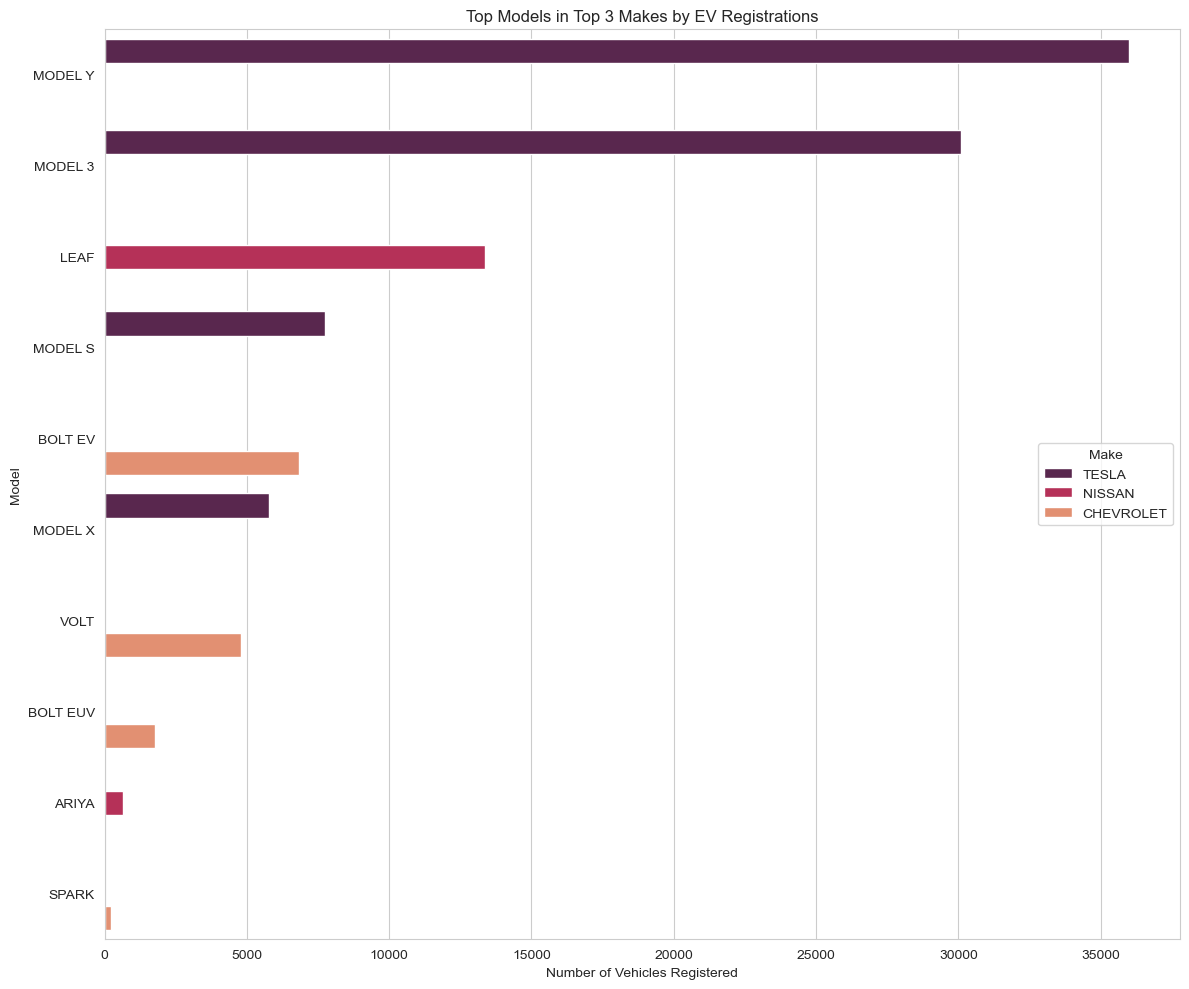

In [107]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="rocket")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

In [110]:
ev.rename(columns={'Electric Range':'Electric_range'},inplace = True)

In [117]:
df1 = pd.DataFrame(ev.Electric_range)
df1

,Electric_range
0,291
1,0
2,270
3,210
4,0
...,...
177861,0
177862,0
177863,0
177864,0


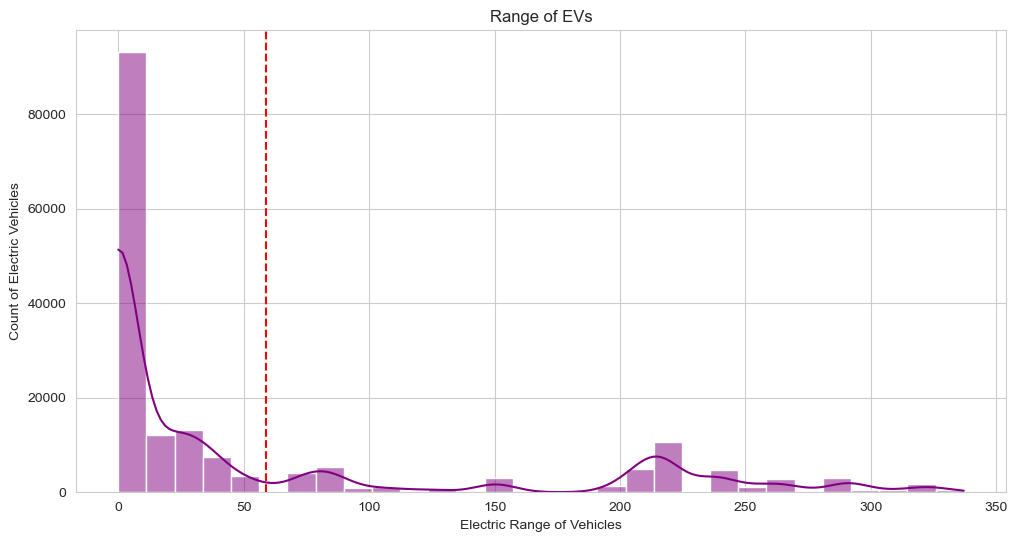

In [135]:
plt.figure(figsize = (12,6))
sns.histplot(ev.Electric_range,bins = 30,kde=True, color='purple')##kde gives PDF of random continous varible
plt.title('Range of EVs')
plt.xlabel("Electric Range of Vehicles")
plt.ylabel('Count of Electric Vehicles')
plt.axvline(ev.Electric_range.mean(), linestyle='--',color='red');##shows mean of electric range of vehciles

In [136]:
ev.head(2)

,VIN (1-10),County,City,State,Postal_Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric_range,Base MSRP,Legislative_District,DOL Vehicle ID,Vehicle_Location,Electric_Utility,Census_Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


In [143]:
ev_range_over_yrs = ev.groupby('Model Year').Electric_range.mean()
ev_range_over_yrs

Model Year
1997     39.000000
1998     58.000000
1999     74.000000
2000     58.000000
2002     95.000000
2003     95.000000
2008    220.000000
2010    226.086957
2011     70.891613
2012     61.212608
2013     79.852574
2014     80.669706
2015     98.164740
2016    101.279227
2017    114.124153
2018    156.140194
2019    176.892596
2020    238.690347
2021     11.408426
2022      4.523870
2023      3.731207
2024     16.791667
Name: Electric_range, dtype: float64

Text(0, 0.5, 'Ev Range')

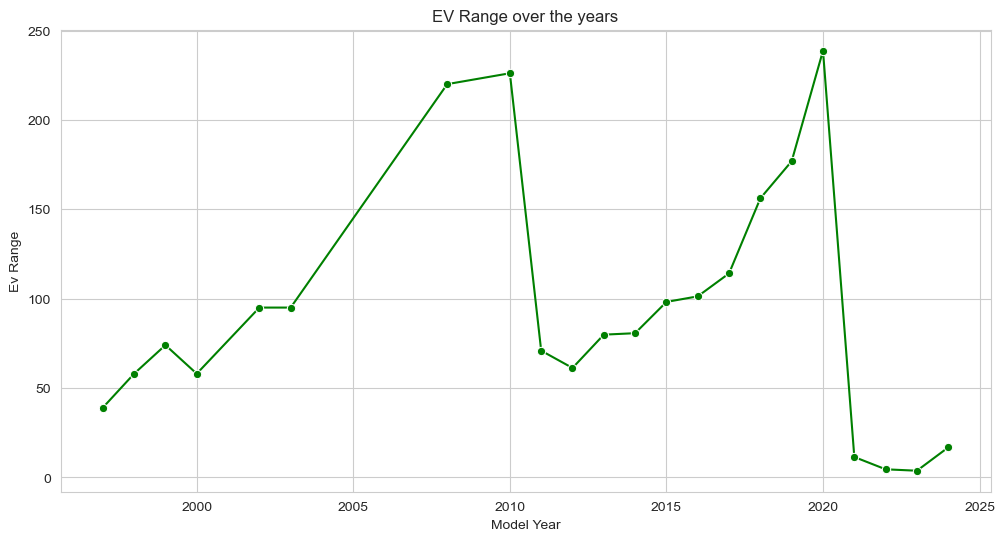

In [151]:
plt.figure(figsize = (12,6))
sns.lineplot(x =ev_range_over_yrs.index,y = ev_range_over_yrs.values,color = 'green',marker = 'o' )
plt.title("EV Range over the years")
plt.xlabel('Model Year')
plt.ylabel("Ev Range")



In [152]:
from scipy.optimize import curve_fit

In [154]:
ev_registration_counts = ev['Model Year'].value_counts()
ev_registration_counts

Model Year
2023    57587
2022    27776
2021    19132
2018    14323
2020    11768
2019    10940
2017     8562
2024     7080
2016     5483
2015     4844
2013     4409
2014     3509
2012     1618
2011      775
2010       23
2008       20
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64

In [158]:
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))
forecasted_evs

{2024: 79092.26295654276,
 2025: 119565.00702317535,
 2026: 180748.28523122185,
 2027: 273240.0007946698,
 2028: 413061.16923190857,
 2029: 624431.0094825621}

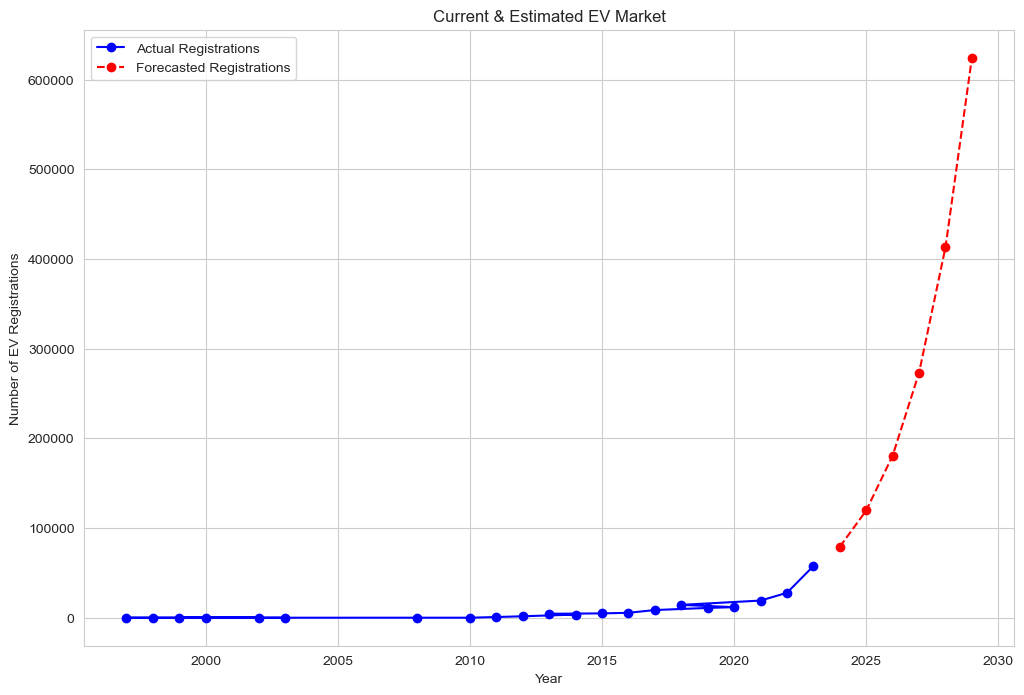

In [160]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)